# Hello Graph World

This notebook will focus on creating the nodes and edges for a basic graph, such as the Krackhardt kite. Our data of choice will be using Disney+ Streaming service of their movies and TV Shows where we can look into the relationship of directors and the genres they create. The data can be acquired from Kaggle [here](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows/data). 

In [1]:
## Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
## Import Dataset
df = pd.read_csv('disney_plus_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
director_genre_df = df[['director', 'cast', 'listed_in']]
director_genre_df = director_genre_df.rename(columns = {'listed_in':'genre'})

director_genre_df.head()

,director,cast,genre
0,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...","Animation, Family"
1,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Comedy
2,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...","Animation, Comedy, Family"
3,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Musical
4,NaN,"John Lennon, Paul McCartney, George Harrison, ...","Docuseries, Historical, Music"


In [4]:
director_genre_df['director'] = director_genre_df['director'].str.split(", ")
director_genre_df['cast'] = director_genre_df['cast'].str.split(", ")
director_genre_df['genre'] = director_genre_df['genre'].str.split(", ")
director_genre_df

,director,cast,genre
0,"[Alonso Ramirez Ramos, Dave Wasson]","[Chris Diamantopoulos, Tony Anselmo, Tress Mac...","[Animation, Family]"
1,[John Cherry],"[Jim Varney, Noelle Parker, Douglas Seale]",[Comedy]
2,[Karen Disher],"[Raymond Albert Romano, John Leguizamo, Denis ...","[Animation, Comedy, Family]"
3,[Hamish Hamilton],"[Darren Criss, Adam Lambert, Derek Hough, Alex...",[Musical]
4,NaN,"[John Lennon, Paul McCartney, George Harrison,...","[Docuseries, Historical, Music]"
...,...,...,...
1445,[Gavin Hood],"[Hugh Jackman, Liev Schreiber, Danny Huston, w...","[Action-Adventure, Family, Science Fiction]"
1446,[Shawn Levy],"[Ben Stiller, Amy Adams, Owen Wilson, Hank Aza...","[Action-Adventure, Comedy, Family]"
1447,[Dexter Fletcher],"[Tom Costello, Jo Hartley, Keith Allen, Dickon...","[Biographical, Comedy, Drama]"
1448,[Gurinder Chadha],"[Parminder Nagra, Keira Knightley, Jonathan Rh...","[Buddy, Comedy, Coming of Age]"


In [5]:
explode_df = director_genre_df.explode(['director'])
explode_df = explode_df.explode(['cast'])
explode_df = explode_df.explode(['genre'])
explode_df.head()

,director,cast,genre
0,Alonso Ramirez Ramos,Chris Diamantopoulos,Animation
0,Alonso Ramirez Ramos,Chris Diamantopoulos,Family
0,Alonso Ramirez Ramos,Tony Anselmo,Animation
0,Alonso Ramirez Ramos,Tony Anselmo,Family
0,Alonso Ramirez Ramos,Tress MacNeille,Animation


In [6]:
G = nx.from_pandas_edgelist(explode_df, "director", "cast")

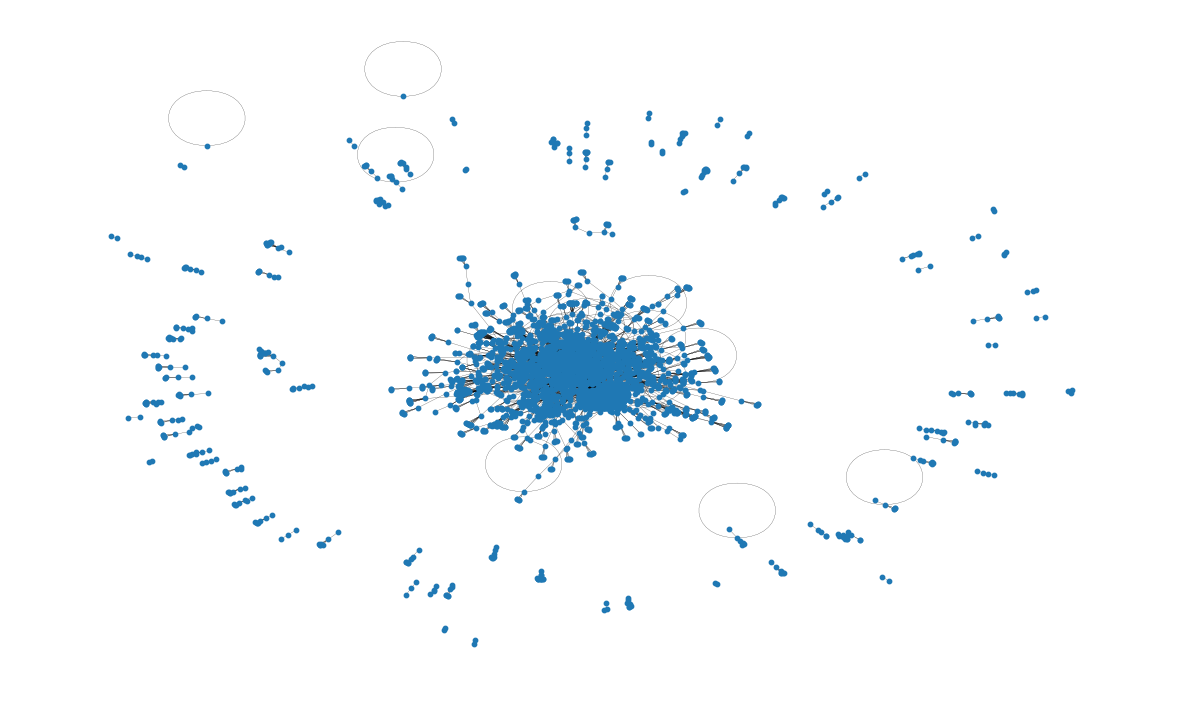

In [7]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=123), ax=ax, **plot_options)

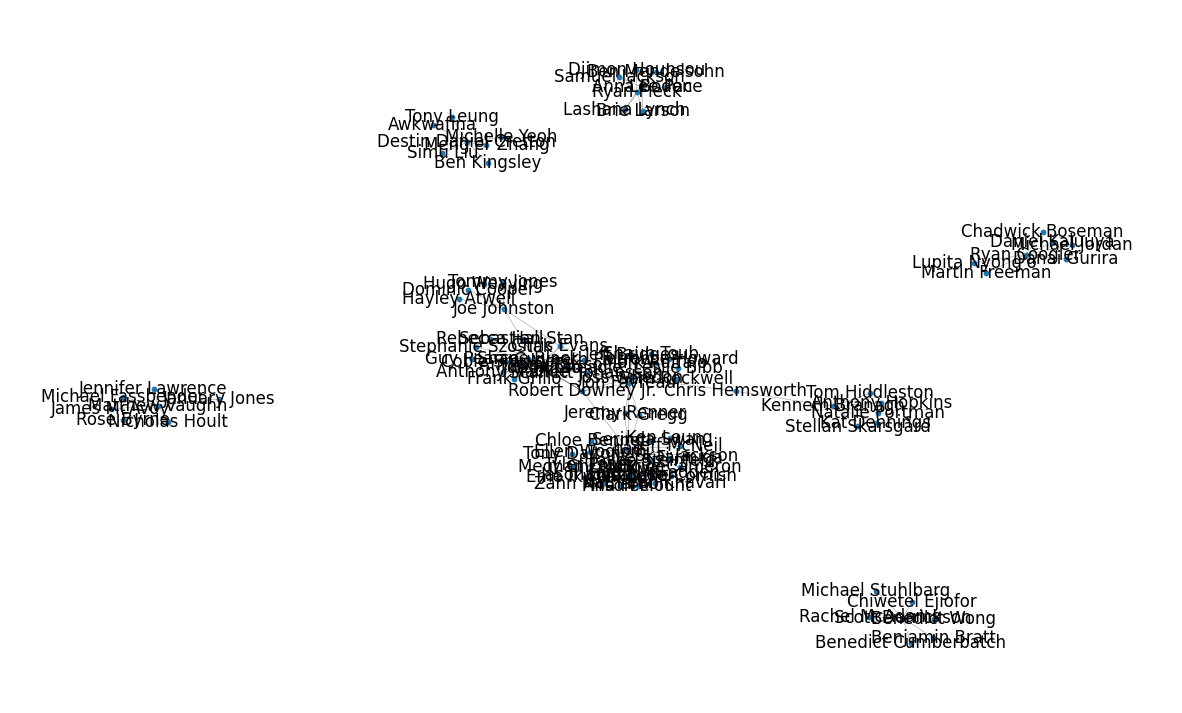

In [8]:
genre_df = explode_df[explode_df['genre'].isin(['Superhero'])]
G = nx.from_pandas_edgelist(genre_df, "director", "cast")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": True, "width": 0.15}
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=123), ax=ax, **plot_options)

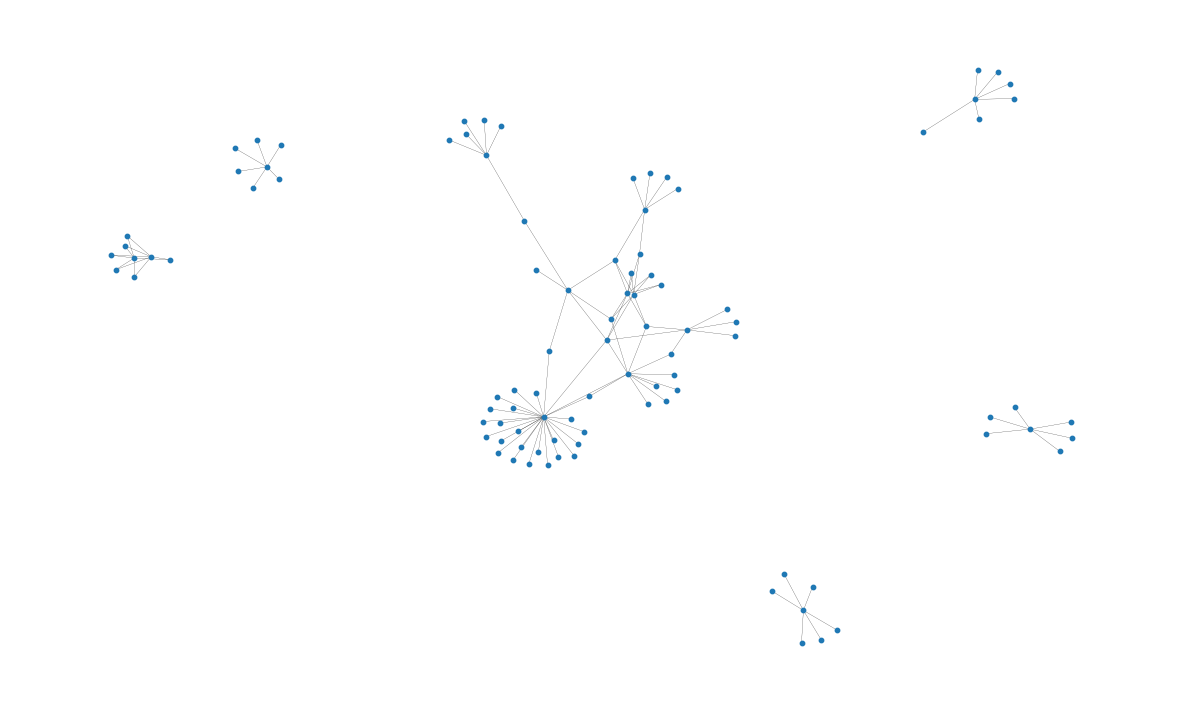

In [9]:
genre_df = explode_df[explode_df['genre'].isin(['Superhero'])]
G = nx.from_pandas_edgelist(genre_df, "director", "cast")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.spring_layout(G), ax=ax, **plot_options)

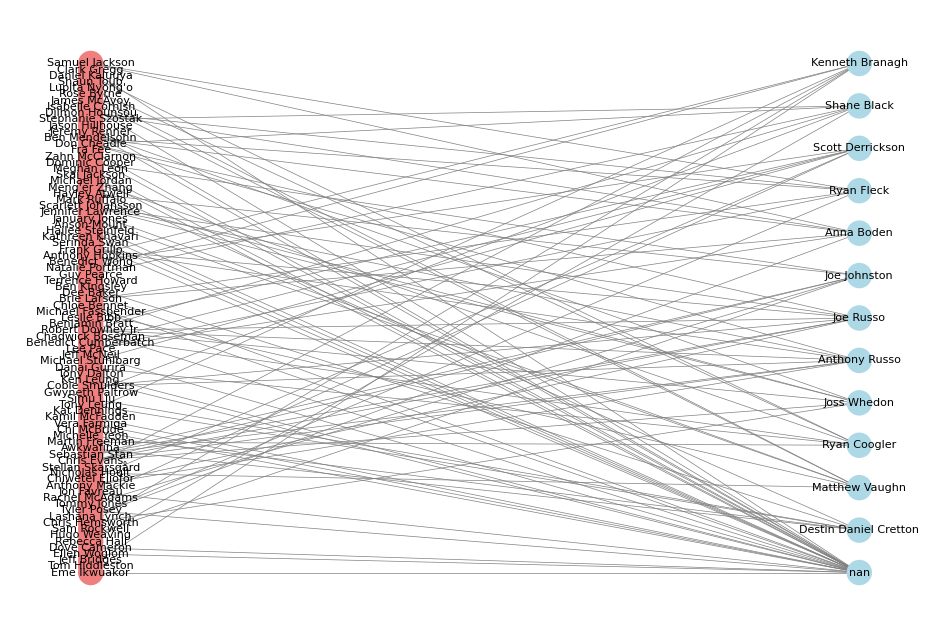

In [10]:
# Create Graph (Bipartite)
G = nx.from_pandas_edgelist(genre_df, "director", "cast")

# Determine node categories
directors = set(genre_df["director"])
genres = set(genre_df["cast"])

# Set node colors
color_map = ["lightblue" if node in directors else "lightcoral" for node in G.nodes]

# Use bipartite layout for better separation
pos = nx.bipartite_layout(G, genres)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")

nx.draw(
    G, 
    pos, 
    ax=ax, 
    node_color=color_map, 
    edge_color="gray",
    node_size=300, 
    with_labels=True,
    font_size=8, 
    width=0.5
)
plt.show()
